In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_col = ["sentence","title","address","phone","datetime","table","client_no","cashier"]
y_col = ["rate","repay","tax","total","pay","text_money","discount"]


In [7]:
train_df = pd.read_csv('../text_classification/total_df.csv',   encoding='utf-8')
train_df.head()

,sentence,rate,repay,tax,total,pay,text_money,discount
0,Tổng:,0,0,0,1,0,0,0
1,68000,0,0,0,1,0,0,0
2,T.CÔNG:,0,0,0,1,0,0,0
3,Tiền mặt 112.000,0,0,0,0,1,0,0
4,TỶ giá 35,1,0,0,0,0,0,0


In [8]:
def count_pandas(df,row):
    count = 0
    for index,data in df.iterrows():
        if data[row] > 0:
            count+= 1
    return count
#     new_pandas = df.query(row+">0")
#     return new_pandas.shape[0]

# count_pandas(train_df,"info")

In [300]:
# Delete same data
# delete_data = []
# for index, row in train_df.iterrows():
#     sentence = row['sentence']
#     for i,r in train_df.iterrows():
#         if i!= index:
#             if r['sentence'] == sentence:
#                 delete_data.append(i)
#                 print("=====")
#                 print(row['sentence'])
#                 print(r['sentence'])

In [301]:
# # delete data
# delete_data = list(set(delete_data))

# org_train_df = train_df
# org_delete_data = delete_data
# delete_data = []
# for i in org_delete_data:
#     delete_data.append(int(i))
# # for index in delete_data:
# #     train_df.drop[train_df.loc(int(index))]
# # print(len(delete_data))
# # print(delete_data)
# train_df = train_df.drop(delete_data)

In [302]:
# train_df.to_csv("31-07-vigroupped.csv", index = False,  encoding='utf-8')

In [303]:
# df.query("brand_name>0")

[3, 10, 4, 61, 19, 5, 12]


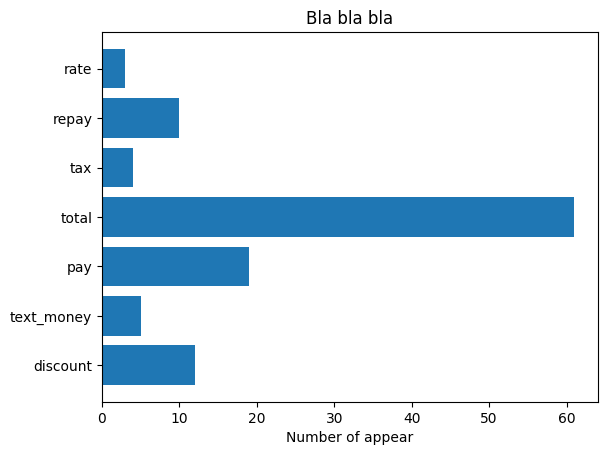

In [9]:
# Explore data
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data

y_pos = np.arange(len(y_col))
performance = []

for col in y_col:
    performance.append(count_pandas(train_df,col))

print(performance)
error = np.random.rand(len(y_col))

ax.barh(y_col, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_col)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of appear')
ax.set_title('Bla bla bla')

plt.show()

In [10]:
import numpy as np
import os
import pickle
from keras.optimizers import SGD, Adam, Nadam, RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing import sequence
from keras.models import Sequential,Model,load_model
from keras.layers import Embedding,Conv1D,MaxPooling1D
from keras.layers.core import Dense, Activation,Dropout ,Flatten
from keras.layers.recurrent import LSTM
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence,one_hot,Tokenizer
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint,TensorBoard, ReduceLROnPlateau,EarlyStopping
from keras.applications import Xception
from keras import regularizers
from keras import backend as K
import keras
import numpy as np
import pandas as pd
import cv2
import os
import glob
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [11]:
seed = 120
np.random.seed(seed)
train_df = shuffle(train_df)
train_df.head()

,sentence,rate,repay,tax,total,pay,text_money,discount
80,"| GIAMITIEN HB) -10,000.",0,0,0,0,0,0,1
41,"GIẢM % MÓN =7,500",0,0,0,0,0,0,1
83,Giảm giá: 0% = 0 VNĐ,0,0,0,0,0,0,1
107,"T.CONG 34 1,118,000",0,0,0,1,0,0,0
108,95000,0,0,0,1,0,0,0


In [12]:
X_train = train_df["sentence"].fillna("fillna").values
Y_train = train_df[y_col].values

In [13]:
print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)

Shape of X_train: (114,)
Shape of Y_train: (114, 7)


In [14]:
Tokenizer = Tokenizer()
print(X_train[0])
print("(Input->Sentence) Length of X_train:",X_train.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels
texts = X_train
print(texts[1])

| GIAMITIEN HB) -10,000.
(Input->Sentence) Length of X_train: (114,)
(output->Labels) Length of Y_train: (114, 7)
GIẢM % MÓN =7,500


In [15]:
Tokenizer.fit_on_texts(texts) 
Tokenizer_vocab_size = len(Tokenizer.word_index) + 1
print("Tokenizer vocabulary size:",Tokenizer_vocab_size)
len(max(X_train,key=len))


Tokenizer vocabulary size: 207


35

In [16]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)
print("(Input->Sentence) Length of X_train:",X_train.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels

(Input->Sentence) Length of X_train: (91,)
(output->Labels) Length of Y_train: (91, 7)


In [17]:
X_train_encoded_words = Tokenizer.texts_to_sequences(X_train)
X_val_encoded_words = Tokenizer.texts_to_sequences(X_val)

In [18]:
print(X_train[2])
print(X_train_encoded_words[2])
print(Tokenizer.word_index)

Khách đưa - 1,500,500
[7, 15, 8, 10, 10]
{'000': 1, '0': 2, 'tiền': 3, 't': 4, '00': 5, 'tổng': 6, 'khách': 7, '1': 8, 'tien': 9, '500': 10, 'trả': 11, 'giam': 12, 'rm': 13, 'lại': 14, 'đưa': 15, 'cong': 16, 'mặt': 17, 'total': 18, 'mon': 19, '735': 20, 'trăm': 21, '9': 22, '6': 23, '35': 24, '5': 25, '10': 26, 'vnđ': 27, 'tiên': 28, 'hai': 29, 'ngàn': 30, '103': 31, 'lai': 32, 'thanh': 33, 'toán': 34, 'tra': 35, 'công': 36, '95': 37, '200': 38, 'hb': 39, 'giảm': 40, '7': 41, 'giá': 42, 'khong': 43, 'thue': 44, 'một': 45, '86': 46, 'vat': 47, '328': 48, 'số': 49, '8': 50, '3': 51, '319': 52, '25': 53, '—': 54, '4': 55, '58': 56, 'thuế': 57, 'ˆ': 58, '16': 59, 'mươi': 60, 'hàng': 61, 'tam': 62, 'mat': 63, '750': 64, 'adjustment': 65, '02': 66, 'ngan': 67, '85': 68, 'ban': 69, 'giamitien': 70, 'món': 71, '34': 72, '118': 73, '95000': 74, 'service': 75, 'charge': 76, 'ten': 77, '480': 78, '540000': 79, 'mười': 80, 'đồng': 81, '“sở': 82, "'tiên": 83, 'thôi': 84, 'rounded': 85, '130': 86, '

In [19]:
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labelsprint("(Input->Sentence)

(output->Labels) Length of Y_train: (91, 7)


In [20]:
maxWordCount= 450
maxDictionary_size=Tokenizer_vocab_size
X_train_encoded_padded_words = sequence.pad_sequences(X_train_encoded_words, maxlen=maxWordCount)
X_val_encoded_padded_words = sequence.pad_sequences(X_val_encoded_words, maxlen=maxWordCount)

In [21]:
print("(Input->Sentence) Length of X_train:",X_train_encoded_padded_words.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels

(Input->Sentence) Length of X_train: (91, 450)
(output->Labels) Length of Y_train: (91, 7)


In [22]:
print(Y_train.shape)
print(Y_val.shape)

(91, 7)
(23, 7)


In [23]:
# Model

model = Sequential()

model.add(Embedding(maxDictionary_size, 32, input_length=maxWordCount)) #to change words to ints
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.5))
# model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
 #hidden layers
model.add(LSTM(10))
# model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(1200, activation='relu',W_constraint=maxnorm(1)))
# model.add(Dropout(0.6))
model.add(Dense(500, activation='relu',W_constraint=maxnorm(1)))

# model.add(Dropout(0.5))
 #output layer
model.add(Dense(7, activation='softmax'))

# Compile model
# adam=Adam(lr=learning_rate, beta_1=0.7, beta_2=0.999, epsilon=1e-08, decay=0.0000001)

model.summary()

W0807 21:54:19.257445 4335691200 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 21:54:19.271152 4335691200 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 21:54:19.278012 4335691200 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 21:54:19.457556 4335691200 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:13

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 450, 32)           6624      
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                1720      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1200)              13200     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               600500    
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 3507      
Total params: 625,551
Trainable params: 625,551
Non-trainable params: 0
_________________________________________________________________


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1200, activation="relu", kernel_constraint=<keras.con...)`
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="relu", kernel_constraint=<keras.con...)`


In [24]:
learning_rate=0.0001
epochs = 25
batch_size = 32 #32
sgd = SGD(lr=learning_rate, nesterov=True, momentum=0.7, decay=1e-4)
Nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
model.compile(loss='categorical_crossentropy', optimizer=Nadam, metrics=['accuracy'])

W0807 21:54:21.919422 4335691200 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0807 21:54:21.927731 4335691200 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [25]:
print(X_train_encoded_padded_words.shape)
print(Y_train.shape)

print(X_val_encoded_padded_words.shape)
print(Y_val.shape)

(91, 450)
(91, 7)
(23, 450)
(23, 7)


In [26]:
history  = model.fit(X_train_encoded_padded_words,Y_train, epochs = epochs, batch_size=batch_size, verbose=1,
validation_data=(X_val_encoded_padded_words, Y_val))

W0807 21:54:28.372059 4335691200 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 91 samples, validate on 23 samples
Epoch 1/25
91/91 [==============================] - 2s 20ms/step - loss: 1.9151 - acc: 0.3516 - val_loss: 1.7460 - val_acc: 0.6087
Epoch 2/25
91/91 [==============================] - 1s 8ms/step - loss: 1.6978 - acc: 0.5165 - val_loss: 1.3048 - val_acc: 0.6087
Epoch 3/25
91/91 [==============================] - 1s 10ms/step - loss: 1.4710 - acc: 0.5165 - val_loss: 1.2136 - val_acc: 0.6087
Epoch 4/25
91/91 [==============================] - 1s 8ms/step - loss: 1.4078 - acc: 0.5165 - val_loss: 1.1471 - val_acc: 0.6087
Epoch 5/25
91/91 [==============================] - 1s 9ms/step - loss: 1.3951 - acc: 0.5165 - val_loss: 1.1224 - val_acc: 0.6087
Epoch 6/25
91/91 [==============================] - 1s 8ms/step - loss: 1.2762 - acc: 0.5275 - val_loss: 1.0668 - val_acc: 0.6087
Epoch 7/25
91/91 [==============================] - 1s 7ms/step - loss: 1.2290 - acc: 0.5495 - val_loss: 1.0242 - val_acc: 0.6087
Epoch 8/25
91/91 [==========================

In [27]:
score = model.evaluate(X_val_encoded_padded_words, Y_val, verbose=1)
print('Test accuracy:', score[1],'%')

23/23 [==============================] - 0s 2ms/step
Test accuracy: 0.695652186870575 %


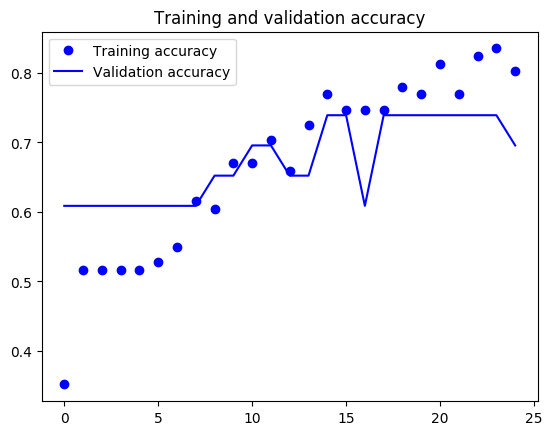

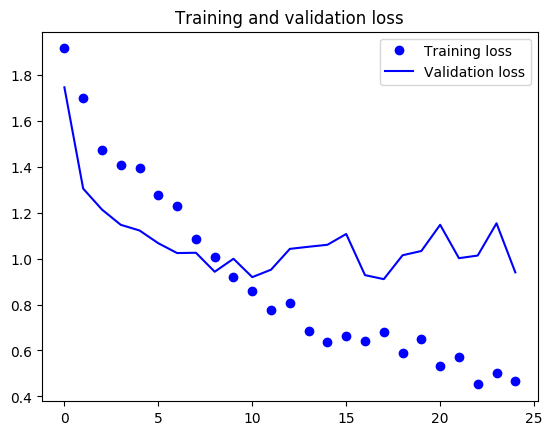

In [28]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
phrase = "Khach dua: 5000"
tokens = Tokenizer.texts_to_sequences([phrase])
tokens = pad_sequences(tokens, maxlen=450)
prediction = model.predict(np.array(tokens))
i_raw,j_raw = np.where(prediction == prediction.max()) #calculates the index of the maximum element of the array across all axis
# i->rows, j->columns
i = int(i_raw)
j = int(j_raw)
print(prediction[0][j])
print(j_raw)
total_possible_outcomes = y_col
print("Result:",total_possible_outcomes[j])

0.9712866
[3]
Result: total


In [35]:
# serialize model to JSON
model_json = model.to_json()
with open("total_model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("total_model.h5")
print("Saved model to disk")

with open('total_tokenizer.pickle', 'wb') as handle:
    pickle.dump(Tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

Saved model to disk
